In [1]:
import pandas as pd;
import tensorflow as tf;
import seaborn as sb;
import matplotlib.pyplot as plt;

from sklearn.preprocessing import MinMaxScaler;
from sklearn.model_selection import train_test_split;
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error;
from tensorflow.keras.models import load_model;

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/cars.csv', index_col=0);
df.head()

,manufacturer,model,body_type,drive_type,transmission_type,engine_capacity,horsepower,fuel_type,mileage,year_of_manufacture,price
0,Mitsubishi,Lancer,Седан,Передній,Ручна / Механіка,1.5,70.0,Бензин,370.0,1988,100
2,Mazda,626,Седан,Передній,Ручна / Механіка,2.0,95.0,Газ / Бензин,388.0,1987,400
8,Mitsubishi,Lancer,Унiверсал,Передній,Ручна / Механіка,1.8,60.0,Дизель,500.0,1988,550
32,Daewoo,Nexia,Седан,Передній,Ручна / Механіка,1.5,75.0,Бензин,138.0,2006,700
37,Opel,Omega,Седан,Задній,Ручна / Механіка,2.0,115.0,Бензин,250.0,1988,700


In [3]:
df.describe()

,engine_capacity,horsepower,mileage,year_of_manufacture,price
count,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000
mean,1.949740,148.357284,213.205439,2008.559061,10444.118808
std,0.570734,61.028167,80.629498,5.573107,9513.558789
min,0.900000,42.000000,1.000000,1977.000000,100.000000
25%,1.600000,110.000000,168.000000,2006.000000,5999.000000
50%,1.900000,140.000000,207.000000,2009.000000,8000.000000
75%,2.000000,170.000000,253.000000,2012.000000,11800.000000
max,6.300000,880.000000,999.000000,2021.000000,209966.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32136 entries, 0 to 42256
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   manufacturer         32136 non-null  object 
 1   model                32136 non-null  object 
 2   body_type            32136 non-null  object 
 3   drive_type           32136 non-null  object 
 4   transmission_type    32136 non-null  object 
 5   engine_capacity      32136 non-null  float64
 6   horsepower           32136 non-null  float64
 7   fuel_type            32136 non-null  object 
 8   mileage              32136 non-null  float64
 9   year_of_manufacture  32136 non-null  int64  
 10  price                32136 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 2.9+ MB


In [5]:
df.insert(0, 'manufacturer_model', df.manufacturer + " " + df.model);
df = df.drop(columns=['manufacturer', 'model']);
df.head()

,manufacturer_model,body_type,drive_type,transmission_type,engine_capacity,horsepower,fuel_type,mileage,year_of_manufacture,price
0,Mitsubishi Lancer,Седан,Передній,Ручна / Механіка,1.5,70.0,Бензин,370.0,1988,100
2,Mazda 626,Седан,Передній,Ручна / Механіка,2.0,95.0,Газ / Бензин,388.0,1987,400
8,Mitsubishi Lancer,Унiверсал,Передній,Ручна / Механіка,1.8,60.0,Дизель,500.0,1988,550
32,Daewoo Nexia,Седан,Передній,Ручна / Механіка,1.5,75.0,Бензин,138.0,2006,700
37,Opel Omega,Седан,Задній,Ручна / Механіка,2.0,115.0,Бензин,250.0,1988,700


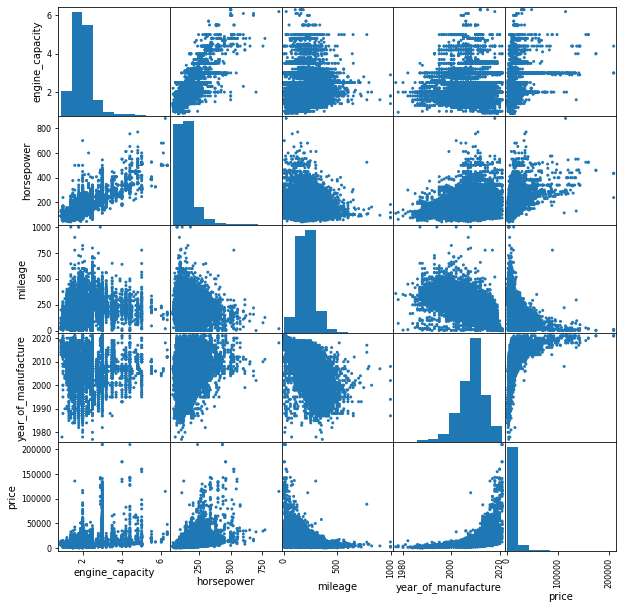

In [6]:
pd.plotting.scatter_matrix(df, figsize=(10, 10), alpha=1, marker='.');

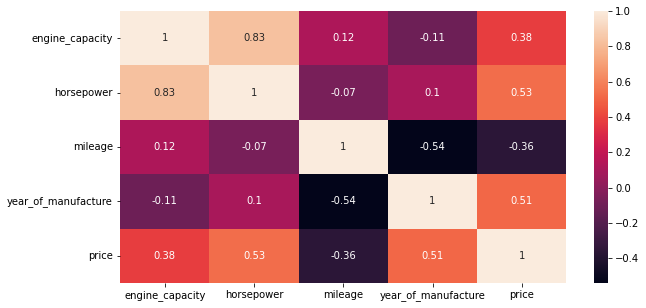

In [7]:
fig, ax = plt.subplots(figsize=(10, 5));
sb.heatmap(df.corr().round(2), annot=True, ax=ax);

In [8]:
df = pd.get_dummies(df);
df.head()

,engine_capacity,horsepower,mileage,year_of_manufacture,price,manufacturer_model_Acura MDX,manufacturer_model_Audi 100,manufacturer_model_Audi A3,manufacturer_model_Audi A4,manufacturer_model_Audi A5,...,transmission_type_Автомат,transmission_type_Варіатор,transmission_type_Робот,transmission_type_Ручна / Механіка,transmission_type_Типтронік,fuel_type_Бензин,fuel_type_Газ,fuel_type_Газ / Бензин,fuel_type_Гібрид,fuel_type_Дизель
0,1.5,70.0,370.0,1988,100,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,2.0,95.0,388.0,1987,400,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8,1.8,60.0,500.0,1988,550,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
32,1.5,75.0,138.0,2006,700,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
37,2.0,115.0,250.0,1988,700,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['price']), df.price, test_size=0.20, random_state=1);

scaler = MinMaxScaler();

numerical_columns = ['engine_capacity', 'horsepower', 'mileage', 'year_of_manufacture'];
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns]);
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns]);

In [10]:
X_train.head()

,engine_capacity,horsepower,mileage,year_of_manufacture,manufacturer_model_Acura MDX,manufacturer_model_Audi 100,manufacturer_model_Audi A3,manufacturer_model_Audi A4,manufacturer_model_Audi A5,manufacturer_model_Audi A6,...,transmission_type_Автомат,transmission_type_Варіатор,transmission_type_Робот,transmission_type_Ручна / Механіка,transmission_type_Типтронік,fuel_type_Бензин,fuel_type_Газ,fuel_type_Газ / Бензин,fuel_type_Гібрид,fuel_type_Дизель
32199,0.203704,0.144630,0.172345,0.795455,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
16160,0.129630,0.081146,0.259519,0.659091,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
18379,0.203704,0.152745,0.199399,0.659091,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
24640,0.129630,0.097852,0.080160,0.840909,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
20978,0.203704,0.133652,0.100200,0.704545,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal', input_dim=len(X_train.columns)),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.01),
    tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.01),
    tf.keras.layers.Dense(1, activation='linear', kernel_initializer='he_normal')
]);

model.compile(optimizer='adam', loss='mse', metrics='mae');
model.build();

model.summary();

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               62464     
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 32)               

In [28]:
model.fit(X_train, y_train, epochs=225, batch_size=256);

Epoch 1/225
101/101 [==============================] - 3s 11ms/step - loss: 169031088.0000 - mae: 8804.0361
Epoch 2/225
101/101 [==============================] - 2s 18ms/step - loss: 66882948.0000 - mae: 3943.1753
Epoch 3/225
101/101 [==============================] - 1s 13ms/step - loss: 54195768.0000 - mae: 3337.1978
Epoch 4/225
101/101 [==============================] - 1s 14ms/step - loss: 49302656.0000 - mae: 3112.6484
Epoch 5/225
101/101 [==============================] - 1s 14ms/step - loss: 44478064.0000 - mae: 2867.6404
Epoch 6/225
101/101 [==============================] - 1s 14ms/step - loss: 39618784.0000 - mae: 2605.2610
Epoch 7/225
101/101 [==============================] - 2s 17ms/step - loss: 34734500.0000 - mae: 2362.3987
Epoch 8/225
101/101 [==============================] - 3s 26ms/step - loss: 30144036.0000 - mae: 2157.0466
Epoch 9/225
101/101 [==============================] - 2s 21ms/step - loss: 26075180.0000 - mae: 2026.3256
Epoch 10/225
101/101 [==============

In [29]:
#model = load_model('/content/drive/MyDrive/ML_Models/cpp_nn.h5');
y_pred = model.predict(X_train);
print('TRAINING SET RESULTS:');
print('MAE: {}'.format(mean_absolute_error(y_train, y_pred)));
print('MSE: {}'.format(mean_squared_error(y_train, y_pred)));
print('R2 : {}'.format(r2_score(y_train, y_pred)));

print('\nTESTING SET RESULTS:');
y_pred = model.predict(X_test);
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)));
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)));
print('R2 : {}'.format(r2_score(y_test, y_pred)));

804/804 [==============================] - 2s 2ms/step
TRAINING SET RESULTS:
MAE: 808.4155068641617
MSE: 3035721.335923574
R2 : 0.967010999593267

TESTING SET RESULTS:
201/201 [==============================] - 0s 2ms/step
MAE: 1003.1423227990274
MSE: 3368838.9181701783
R2 : 0.960086750214618


In [14]:
# FOR SAVING MODEL
# model.save('/content/drive/MyDrive/ML_Models/cpp_nn.h5');

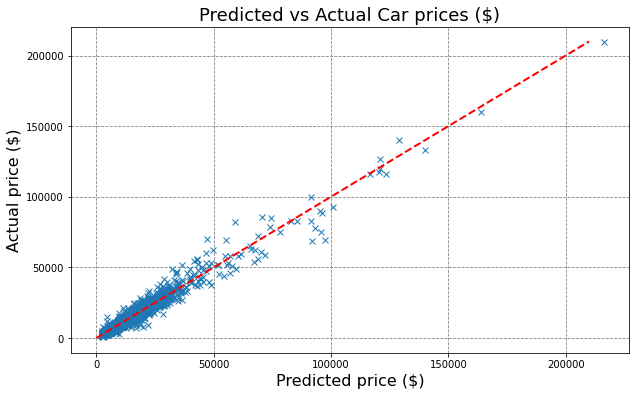

In [16]:
plt.figure(figsize=(10,6));
plt.plot(y_pred, y_test, 'x');
plt.plot([0, 210000], [0, 210000], 'r--', linewidth=2);
plt.title("Predicted vs Actual Car prices ($)", fontsize=18);
plt.xlabel('Predicted price ($)', fontsize=16);
plt.ylabel('Actual price ($)', fontsize=16);
plt.grid(color='grey', linestyle='dashed');